# EDA

This notebook combines all the DataFrame outputted from the data cleaning notebooks, and includes feature engineering. The third part of this notebook shows the correlations of the features per election.

- [Preprocessing](#section1)
- [Feature Engineering](#section2) 
- [Graphical Analysis](#section3)

### Previous Notebook [Data Cleaning](Data_Cleaning.ipynb)
### Next Notebook [Linear Modeling](Strike_a_Line_Pose.ipynb)

<a id='section1'></a>
# Preprocessing and Combining Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
# read in csv files

nov_ur_2004 = pd.read_csv('./csv_files/nov_ur_2004')
nov_ur_2008 = pd.read_csv('./csv_files/nov_ur_2008')
nov_ur_2012 = pd.read_csv('./csv_files/nov_ur_2012')
nov_ur_2016 = pd.read_csv('./csv_files/nov_ur_2016')

oct_ur_2004 = pd.read_csv('./csv_files/oct_ur_2004')
oct_ur_2008 = pd.read_csv('./csv_files/oct_ur_2008')
oct_ur_2012 = pd.read_csv('./csv_files/oct_ur_2012')
oct_ur_2016 = pd.read_csv('./csv_files/oct_ur_2016')

results_2004 = pd.read_csv('./csv_files/results_2004')
results_2008 = pd.read_csv('./csv_files/results_2008')
results_2012 = pd.read_csv('./csv_files/results_2012')
results_2016 = pd.read_csv('./csv_files/results_2016')

edu_2000 = pd.read_csv('./csv_files/edu_2000')
edu_2010 = pd.read_csv('./csv_files/edu_2010')

combines the two unemployment rates

In [4]:
oct_ur_2004.set_index('county', inplace=True)
nov_ur_2004.set_index('county', inplace=True)
nov_ur_2004.drop('year', axis=1, inplace=True)

ur_2004 = pd.concat([oct_ur_2004, nov_ur_2004], axis=1)

In [5]:
oct_ur_2008.set_index('county', inplace=True)
nov_ur_2008.set_index('county', inplace=True)
nov_ur_2008.drop('year', axis=1, inplace=True)

ur_2008 = pd.concat([oct_ur_2008, nov_ur_2008], axis=1)

In [6]:
oct_ur_2012.set_index('county', inplace=True)
nov_ur_2012.set_index('county', inplace=True)
nov_ur_2012.drop('year', axis=1, inplace=True)

ur_2012 = pd.concat([oct_ur_2012, nov_ur_2012], axis=1)

In [7]:
oct_ur_2016.set_index('county', inplace=True)
nov_ur_2016.set_index('county', inplace=True)
nov_ur_2016.drop('year', axis=1, inplace=True)

ur_2016 = pd.concat([oct_ur_2016, nov_ur_2016], axis=1)

concat the election results with the corresponding unemployment rates for each year

In [8]:
# because Shannon County, SD county change it's name to Oglala Lakota County, SD between the 2004 and 2008, 
# I am changing the name to Oglala Lakota County for all elections
def Oglala (df):
    new_county = []
    for count in df['county']:
        if count == 'Shannon, SD':
            count = count.replace('Shannon, SD', 'Oglala Lakota, SD')
            new_county.append(count)          
        else:
            new_county.append(count)
    df.county = new_county
    return df

In [9]:
results_2004 = Oglala(results_2004)
results_2008 = Oglala(results_2008)
results_2012 = Oglala(results_2012)
results_2016 = Oglala(results_2016)

In [10]:
# reset index to be the county names

results_2004.set_index('county', inplace=True)

# Townhall has separated out the results for Bedford City and Bedford County, because 
# these are all one county now all other data is by Bedford county alone, this combines the
# results for the city and county

results_2004.loc['Bedford, VA'] = results_2004.loc['Bedford, VA'] + results_2004.loc['Bedford Co., VA']
results_2004.drop('Bedford Co., VA', inplace=True)

# townhall.com combined results for Kings(Brooklyn) and Richmond(Staten Island) into 
# New York for only the 2004 election. These are the updated repplacement results

results_2004.loc['New York, NY', 'dem_vote'] =  526765
results_2004.loc['New York, NY', 'rep_vote'] =  107405
results_2004.loc['Kings, NY', 'dem_vote'] = 514973
results_2004.loc['Kings, NY', 'rep_vote'] = 167149
results_2004.loc['Kings, NY', 'year'] = 2004
results_2004.loc['Richmond, NY', 'dem_vote'] = 68448
results_2004.loc['Richmond, NY', 'rep_vote'] = 90325
results_2004.loc['Richmond, NY', 'year'] = 2004

res_ur_2004 = pd.concat([results_2004, ur_2004], axis=1)
res_ur_2004['total_vote'] = res_ur_2004['dem_vote'] + res_ur_2004['rep_vote']

In [11]:
res_ur_2004.isnull().any()

dem_vote           True
rep_vote           True
year               True
oct_rate           True
year               True
nov_rate           True
2004_pop_est       True
total area sqmi    True
water area         True
land area          True
per_pov            True
med_income         True
total_vote         True
dtype: bool

In [12]:
results_2008.set_index('county', inplace=True)

results_2008.loc['Bedford, VA'] = results_2008.loc['Bedford, VA'] + results_2008.loc['Bedford Co., VA']
results_2008.drop('Bedford Co., VA', inplace=True)

res_ur_2008 = pd.concat([results_2008, ur_2008], axis=1)
res_ur_2008['total_vote'] = res_ur_2008['dem_vote'] + res_ur_2008['rep_vote']

In [13]:
res_ur_2008.isnull().any()

dem_vote           True
rep_vote           True
year               True
oct_rate           True
year               True
nov_rate           True
2008_pop_est       True
total area sqmi    True
water area         True
land area          True
per_pov            True
med_income         True
total_vote         True
dtype: bool

In [14]:
results_2012.set_index('county', inplace=True)

results_2012.loc['Bedford, VA'] = results_2012.loc['Bedford, VA'] + results_2012.loc['Bedford Co., VA']
results_2012.drop('Bedford Co., VA', inplace=True)

res_ur_2012 = pd.concat([results_2012, ur_2012], axis=1)
res_ur_2012['total_vote'] = res_ur_2012['dem_vote'] + res_ur_2012['rep_vote']

In [15]:
res_ur_2012.isnull().any()

dem_vote           True
rep_vote           True
year               True
oct_rate           True
year               True
nov_rate           True
2012_pop_est       True
total area sqmi    True
water area         True
land area          True
per_pov            True
med_income         True
total_vote         True
dtype: bool

In [16]:
results_2016.set_index('county', inplace=True)

res_ur_2016 = pd.concat([results_2016, ur_2016], axis=1)
res_ur_2016['total_vote'] = res_ur_2016['dem_vote'] + res_ur_2016['rep_vote']

In [17]:
res_ur_2008.isnull().any()

dem_vote           True
rep_vote           True
year               True
oct_rate           True
year               True
nov_rate           True
2008_pop_est       True
total area sqmi    True
water area         True
land area          True
per_pov            True
med_income         True
total_vote         True
dtype: bool

In [18]:
res_ur_2004.shape, res_ur_2008.shape, res_ur_2012.shape, res_ur_2016.shape

((3337, 13), (3337, 13), (3337, 13), (3337, 13))

In [19]:
res_ur_2012.describe()

,dem_vote,rep_vote,year,oct_rate,year,nov_rate,2012_pop_est,total area sqmi,water area,land area,per_pov,med_income,total_vote
count,3.111000e+03,3111.000000,3111.000000,3111.000000,3111.0,3111.000000,3.111000e+03,3111.000000,3111.000000,3111.000000,3111.000000,3111.00000,3.111000e+03
mean,2.002726e+04,18960.045002,2012.646737,7.180039,2012.0,7.160077,1.004924e+05,1006.338428,53.128650,953.209730,17.229219,44727.40630,3.898730e+04
std,6.704728e+04,42304.554005,36.072644,2.646497,0.0,2.632388,3.209693e+05,1329.588600,211.508454,1303.476913,6.570190,11342.89224,1.056071e+05
min,5.000000e+00,54.000000,2012.000000,1.000000,2012.0,1.100000,8.100000e+01,1.990000,0.000000,1.990000,3.100000,22126.00000,6.300000e+01
25%,1.554000e+03,2889.500000,2012.000000,5.200000,2012.0,5.200000,1.122500e+04,444.670000,1.890000,430.970000,12.400000,37105.00000,4.698000e+03
50%,3.945000e+03,6389.000000,2012.000000,7.100000,2012.0,7.000000,2.601700e+04,646.720000,6.330000,612.520000,16.300000,42942.00000,1.052300e+04
75%,1.110750e+04,15941.500000,2012.000000,8.800000,2012.0,8.800000,6.777600e+04,974.880000,20.905000,916.710000,20.900000,49964.50000,2.710700e+04
max,1.781383e+06,754974.000000,4024.000000,28.200000,2012.0,25.100000,9.953555e+06,20105.320000,5424.980000,20052.500000,51.200000,121250.00000,2.536357e+06


In [20]:
res_ur_2004['total_vote_ratio'] = res_ur_2004['total_vote'] / res_ur_2004['2004_pop_est']
res_ur_2008['total_vote_ratio'] = res_ur_2008['total_vote'] / res_ur_2008['2008_pop_est']
res_ur_2012['total_vote_ratio'] = res_ur_2012['total_vote'] / res_ur_2012['2012_pop_est']
res_ur_2016['total_vote_ratio'] = res_ur_2016['total_vote'] / res_ur_2016['2016_pop_est']

In [21]:
res_ur_2004['dem_vote_ratio'] = res_ur_2004['dem_vote'] / res_ur_2004['2004_pop_est']
res_ur_2008['dem_vote_ratio'] = res_ur_2008['dem_vote'] / res_ur_2008['2008_pop_est']
res_ur_2012['dem_vote_ratio'] = res_ur_2012['dem_vote'] / res_ur_2012['2012_pop_est']
res_ur_2016['dem_vote_ratio'] = res_ur_2016['dem_vote'] / res_ur_2016['2016_pop_est']

In [22]:
res_ur_2004['rep_vote_ratio'] = res_ur_2004['rep_vote'] / res_ur_2004['2004_pop_est']
res_ur_2008['rep_vote_ratio'] = res_ur_2008['rep_vote'] / res_ur_2008['2008_pop_est']
res_ur_2012['rep_vote_ratio'] = res_ur_2012['rep_vote'] / res_ur_2012['2012_pop_est']
res_ur_2016['rep_vote_ratio'] = res_ur_2016['rep_vote'] / res_ur_2016['2016_pop_est']

Combine Elections DataFrame with Education DataFrame

In [23]:
print(res_ur_2004.shape, edu_2000.shape)

edu_2000.set_index('county', inplace=True)

df_2004 = pd.concat([res_ur_2004, edu_2000], axis=1)

print(df_2004.shape)

df_2004.dropna(inplace=True)

(3337, 16) (3111, 27)
(3337, 42)


In [24]:
df_2008 = pd.concat([res_ur_2008, edu_2000], axis=1)

print(df_2008.shape)

(3337, 42)


In [25]:
edu_2010.set_index('county', inplace=True)

df_2012 = pd.concat([res_ur_2012, edu_2010], axis=1)

df_2012.shape

(3337, 42)

In [26]:
df_2016 = pd.concat([res_ur_2016, edu_2010], axis=1)

df_2016.shape

(3337, 42)

In [27]:
df_2004['total_vote_ratio'] = df_2004['total_vote'] / df_2004['2004_pop_est']
df_2008['total_vote_ratio'] = df_2008['total_vote'] / df_2008['2008_pop_est']
df_2012['total_vote_ratio'] = df_2012['total_vote'] / df_2012['2012_pop_est']
df_2016['total_vote_ratio'] = df_2016['total_vote'] / df_2016['2016_pop_est']

In [28]:
df_2004['total_vote_ratio'].median()

0.4340570788582085

<a id='section2'></a>
# Feature Engineering 

In [29]:
df_2004.columns

Index(['dem_vote', 'rep_vote', 'year', 'oct_rate', 'year', 'nov_rate',
       '2004_pop_est', 'total area sqmi', 'water area', 'land area', 'per_pov',
       'med_income', 'total_vote', 'total_vote_ratio', 'dem_vote_ratio',
       'rep_vote_ratio', 'continuum_2003', 'influence_2003', 'less_high_1990',
       'high_diploma_1990', 'some_college_1990', 'bachelors_or_higher_1990',
       'per_less_high_1990', 'per_high_diploma_1990', 'per_some_college_1990',
       'per_bachelors_or_higher_1990', 'less_high_2000', 'high_diploma_2000',
       'some_college_2000', 'bachelors_or_higher_2000', 'per_less_high_2000',
       'per_high_diploma_2000', 'per_some_college_2000',
       'per_bachelors_or_higher_2000', 'less_high_change',
       'high_dimploma_change', 'some_college_change', 'bachelors_change',
       'per_less_high_change', 'per_high_dimploma_change',
       'per_some_college_change', 'per_bachelors_change'],
      dtype='object')

In [30]:
df_2004['vote_diff'] = (df_2004.dem_vote - df_2004.rep_vote) / df_2004['2004_pop_est']
df_2008['vote_diff'] = (df_2008.dem_vote - df_2008.rep_vote) / df_2008['2008_pop_est']
df_2012['vote_diff'] = (df_2012.dem_vote - df_2012.rep_vote) / df_2012['2012_pop_est']
df_2016['vote_diff'] = (df_2016.dem_vote - df_2016.rep_vote) / df_2016['2016_pop_est']

In [31]:
df_2004['density'] = df_2004['land area'] / df_2004['2004_pop_est']
df_2008['density'] = df_2008['land area'] / df_2008['2008_pop_est']
df_2012['density'] = df_2012['land area'] / df_2012['2012_pop_est']
df_2016['density'] = df_2016['land area'] / df_2016['2016_pop_est']

In [32]:
df_2004_normalized = df_2004[['oct_rate', 'nov_rate',
                              'density', 'per_pov', 'med_income', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2003', 'influence_2003', 
                              'per_less_high_2000', 'per_high_diploma_2000', 'per_some_college_2000', 
                              'per_bachelors_or_higher_2000', 'per_less_high_change', 
                              'per_high_dimploma_change', 'per_some_college_change', 
                              'per_bachelors_change']]

# 'less_high_change', 'high_dimploma_change', 'some_college_change', 'bachelors_change',

In [33]:
df_2008_normalized = df_2008[['oct_rate', 'nov_rate',
                              'density', 'per_pov', 'med_income', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2003', 'influence_2003', 
                              'per_less_high_2000', 'per_high_diploma_2000', 'per_some_college_2000', 
                              'per_bachelors_or_higher_2000', 'per_less_high_change', 
                              'per_high_dimploma_change', 'per_some_college_change', 
                              'per_bachelors_change']]
# 'less_high_change', 'high_dimploma_change', 'some_college_change', 'bachelors_change',

In [34]:
df_2012_normalized = df_2012[['oct_rate', 'nov_rate',
                              'density', 'per_pov', 'med_income', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2013', 'influence_2013', 
                              'per_less_high_2011', 'per_high_diploma_2011', 'per_some_college_2011', 
                              'per_bachelors_or_higher_2011', 'per_less_high_change', 
                              'per_high_diploma_change', 'per_some_college_change', 
                              'per_bachelors_change']]
# 'less_high_change', 'high_dimploma_change', 'some_college_change', 'bachelors_change',

In [35]:
df_2016_normalized = df_2016[['oct_rate', 'nov_rate',
                              'density', 'per_pov', 'med_income', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2013', 'influence_2013', 
                              'per_less_high_2011', 'per_high_diploma_2011', 
                              'per_some_college_2011', 'per_bachelors_or_higher_2011', 
                              'per_less_high_change', 'per_high_diploma_change', 
                              'per_some_college_change', 'per_bachelors_change']]
# 'less_high_change', 'high_dimploma_change', 'some_college_change', 'bachelors_change',

In [36]:
df_2004_normalized.drop(['Loving, TX', 'El Paso, TX'], axis=0, inplace=True)
df_2008_normalized.drop(['Loving, TX', 'El Paso, TX'], axis=0, inplace=True)
df_2012_normalized.drop(['Loving, TX', 'El Paso, TX'], axis=0, inplace=True)
df_2016_normalized.drop(['Loving, TX', 'El Paso, TX'], axis=0, inplace=True)

/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing 

In [37]:
df_2004_normalized[df_2004_normalized.rep_vote_ratio > 1]

,oct_rate,nov_rate,density,per_pov,med_income,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2003,influence_2003,per_less_high_2000,per_high_diploma_2000,per_some_college_2000,per_bachelors_or_higher_2000,per_less_high_change,per_high_dimploma_change,per_some_college_change,per_bachelors_change


In [38]:
df_2008_normalized[df_2008_normalized.total_vote_ratio > 1]

,oct_rate,nov_rate,density,per_pov,med_income,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2003,influence_2003,per_less_high_2000,per_high_diploma_2000,per_some_college_2000,per_bachelors_or_higher_2000,per_less_high_change,per_high_dimploma_change,per_some_college_change,per_bachelors_change


In [39]:
df_2012_normalized[df_2012_normalized.total_vote_ratio > 1]

,oct_rate,nov_rate,density,per_pov,med_income,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2013,influence_2013,per_less_high_2011,per_high_diploma_2011,per_some_college_2011,per_bachelors_or_higher_2011,per_less_high_change,per_high_diploma_change,per_some_college_change,per_bachelors_change


In [40]:
df_2016_normalized[df_2016_normalized.total_vote_ratio > 1]

,oct_rate,nov_rate,density,per_pov,med_income,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2013,influence_2013,per_less_high_2011,per_high_diploma_2011,per_some_college_2011,per_bachelors_or_higher_2011,per_less_high_change,per_high_diploma_change,per_some_college_change,per_bachelors_change


<a id='section3'></a>
# Graphical Exploration of Data

The next section shows how the raw data is correlated, each election is in a separate section.
- [2004](#subsection1)
- [2008](#subsection2)
- [2012](#subsection3)
- [2016](#sunsection4)

<a id='subsection1'></a>
## 2004 Election

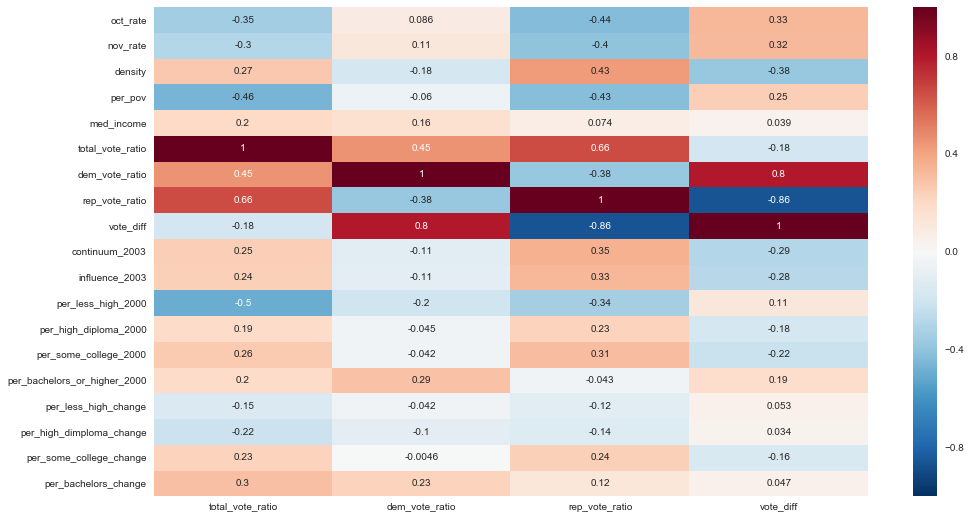

In [41]:
cor = df_2004_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']], annot=True);

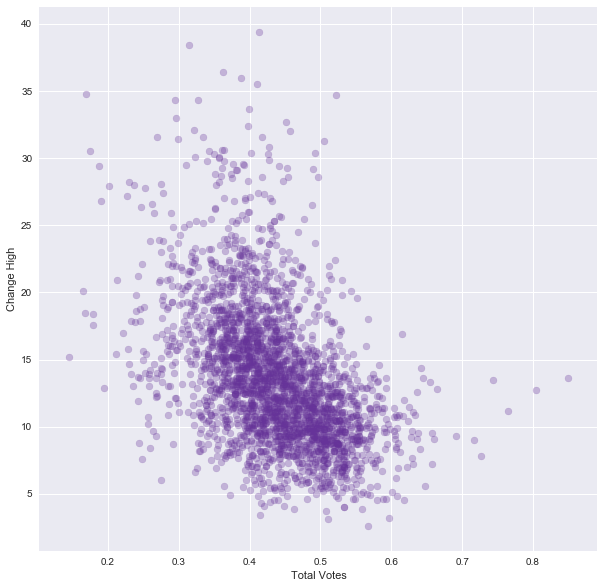

In [42]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Change High')
plt.scatter('total_vote_ratio', 'per_pov', data=df_2004_normalized, alpha=.3, color='rebeccapurple');

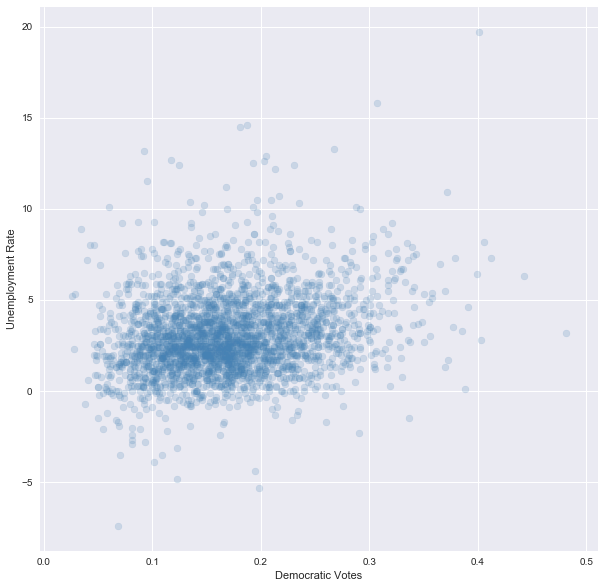

In [43]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'per_bachelors_change', data=df_2004_normalized, alpha=.2, color='steelblue');

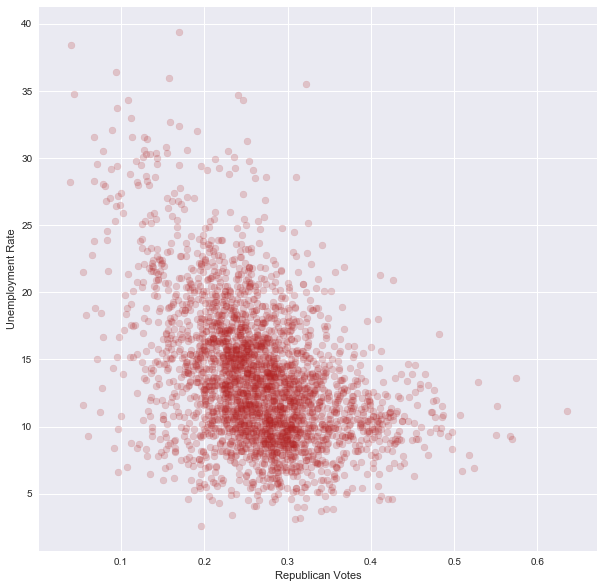

In [44]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'per_pov', data=df_2004_normalized, alpha=.2, color='firebrick');

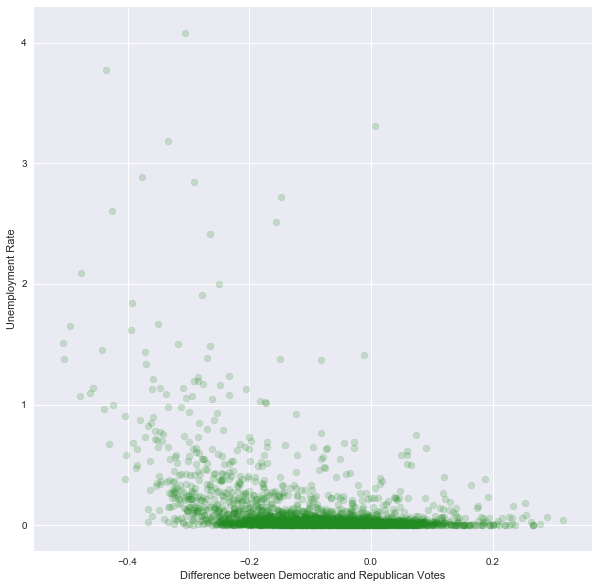

In [45]:
plt.figure(figsize = [10, 10])
plt.xlabel('Difference between Democratic and Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('vote_diff', 'density', data=df_2004_normalized, alpha=.2, color='forestgreen');

<a id='subsection2'></a>
## 2008 Election

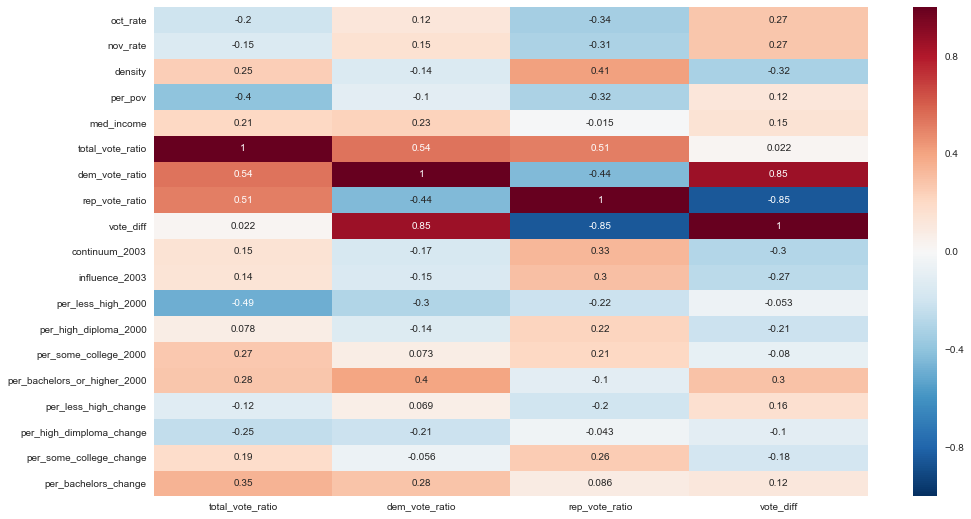

In [46]:
cor = df_2008_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']], annot=True);

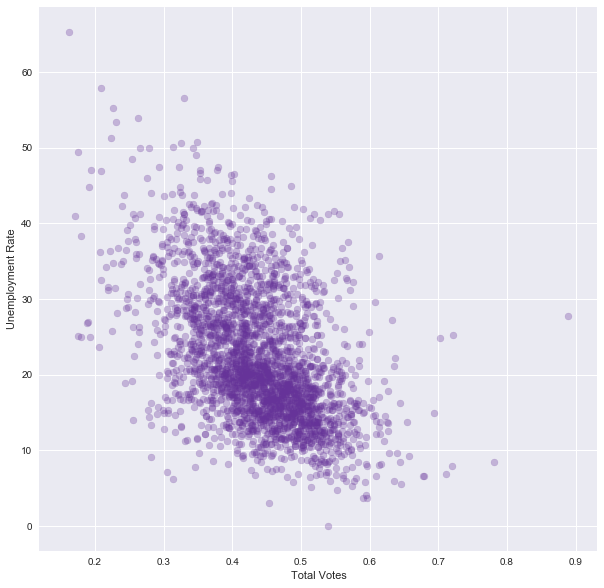

In [47]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'per_less_high_2000', data=df_2008_normalized, alpha=.3, color='rebeccapurple');

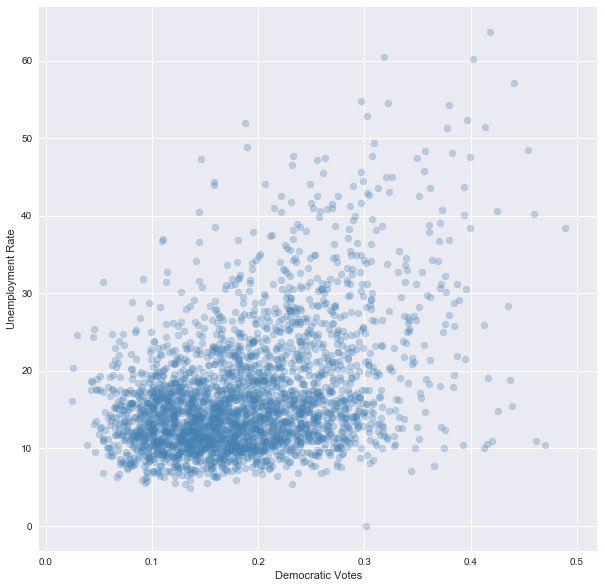

In [48]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'per_bachelors_or_higher_2000', data=df_2008_normalized, alpha=.3, color='steelblue');

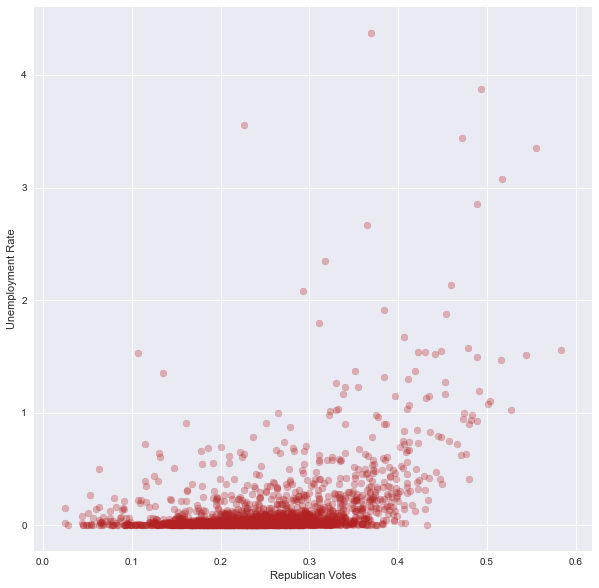

In [49]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'density', data=df_2008_normalized, alpha=.3, color='firebrick');

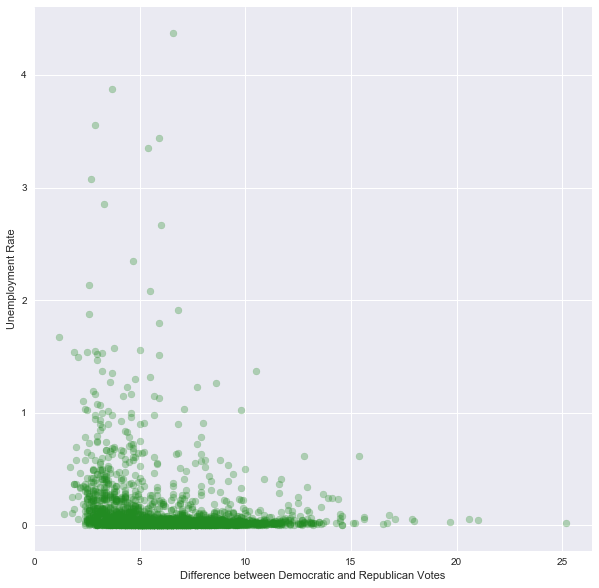

In [50]:
plt.figure(figsize = [10, 10])
plt.xlabel('Difference between Democratic and Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('nov_rate', 'density', data=df_2008_normalized, alpha=.3, color='forestgreen');

<a id='subsection3'></a>
## 2012 Election

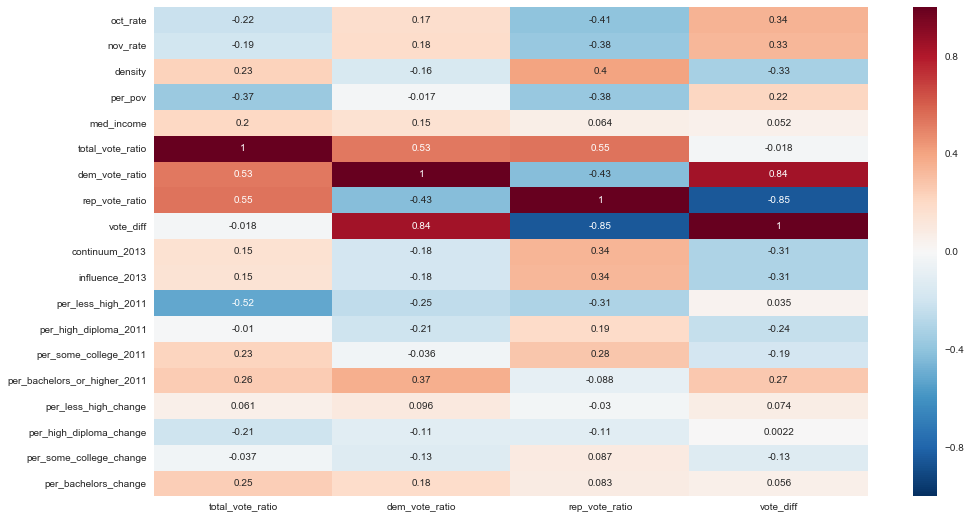

In [51]:
cor = df_2012_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']], annot=True);

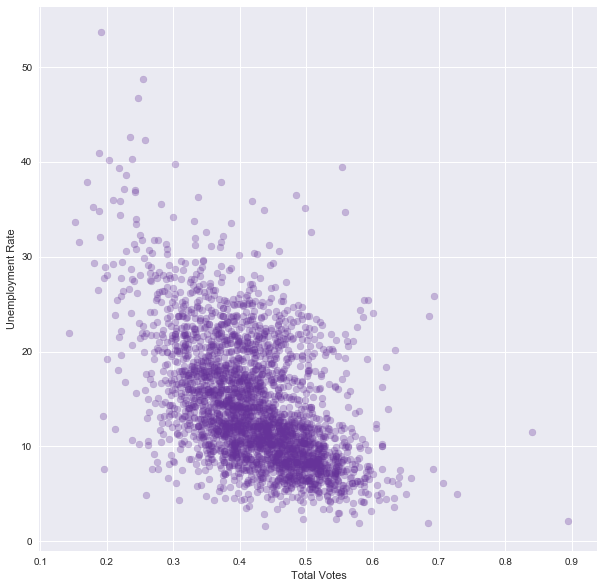

In [52]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'per_less_high_2011', data=df_2012_normalized, alpha=.3, color='rebeccapurple');

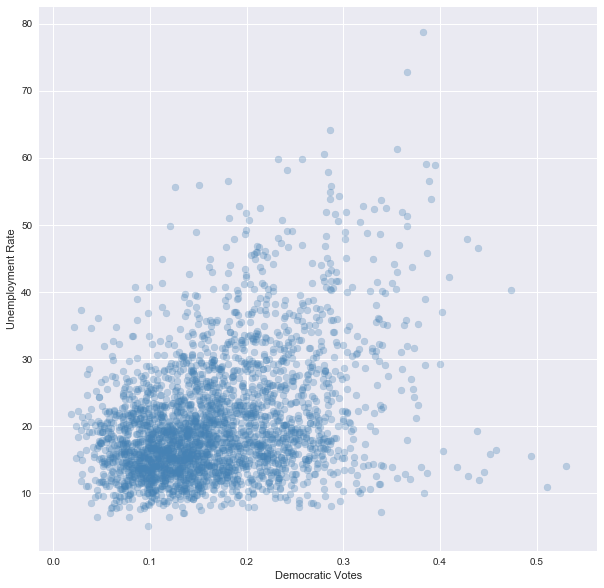

In [53]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'per_bachelors_or_higher_2011', data=df_2012_normalized, alpha=.3, color='steelblue');

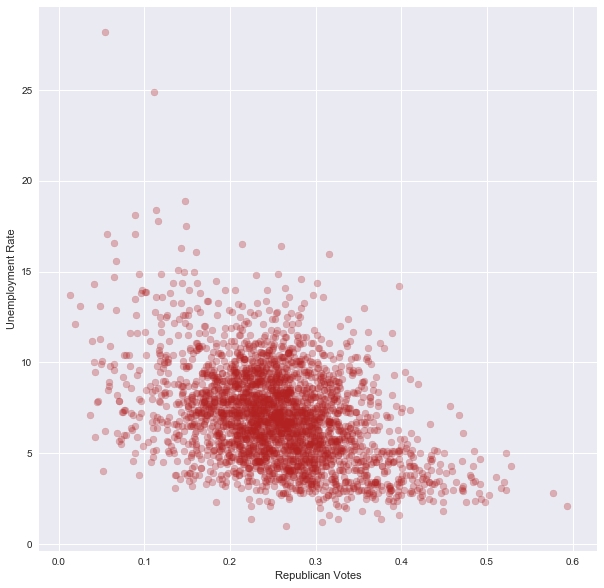

In [54]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'oct_rate', data=df_2012_normalized, alpha=.3, color='firebrick');

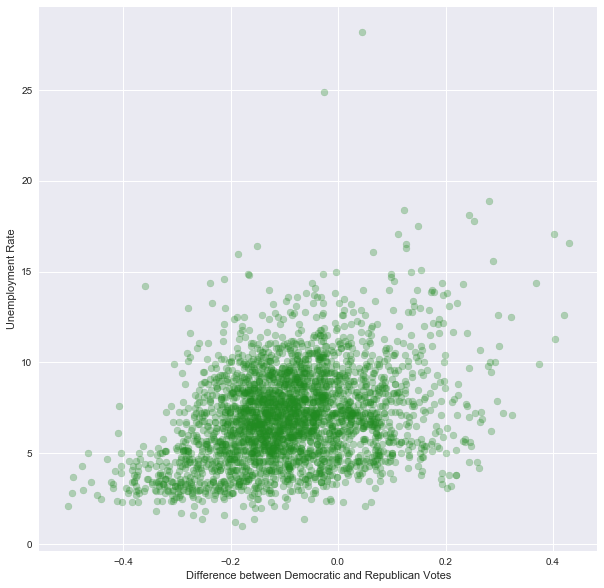

In [55]:
plt.figure(figsize = [10, 10])
plt.xlabel('Difference between Democratic and Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('vote_diff', 'oct_rate', data=df_2012_normalized, alpha=.3, color='forestgreen');

<a id='subsection4'></a>
## 2016 Election

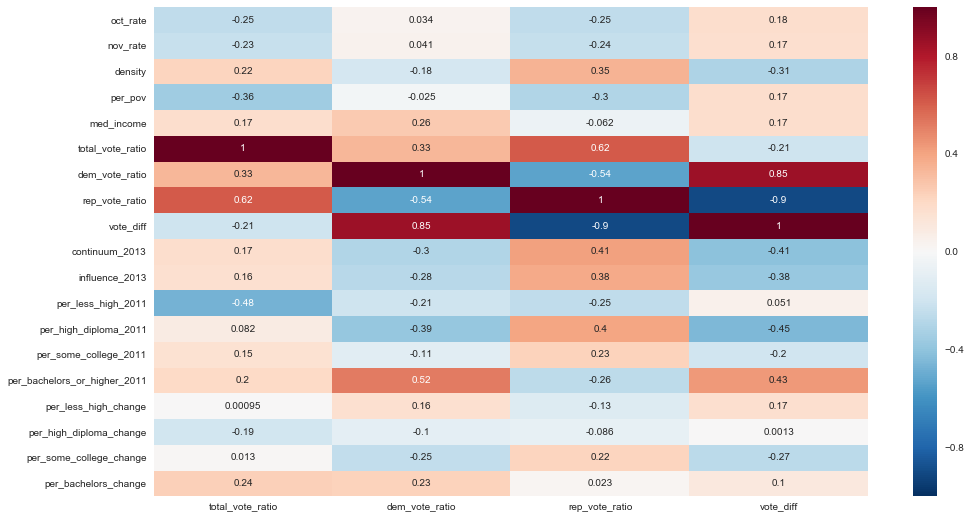

In [56]:
cor = df_2016_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']], annot=True);

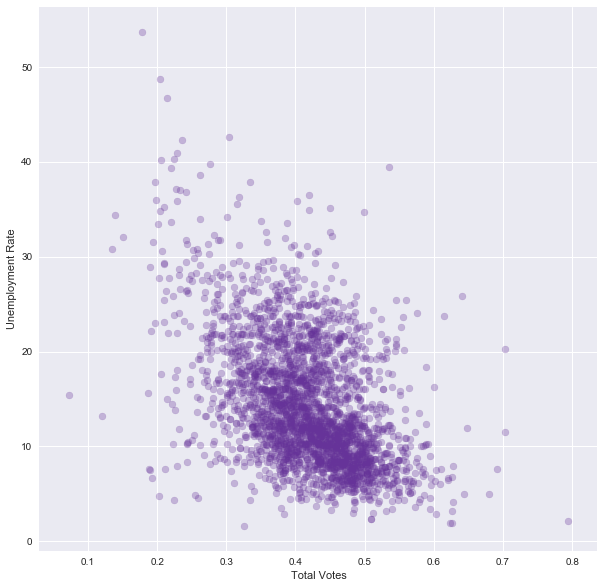

In [57]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'per_less_high_2011', data=df_2016_normalized, alpha=.3, color='rebeccapurple');

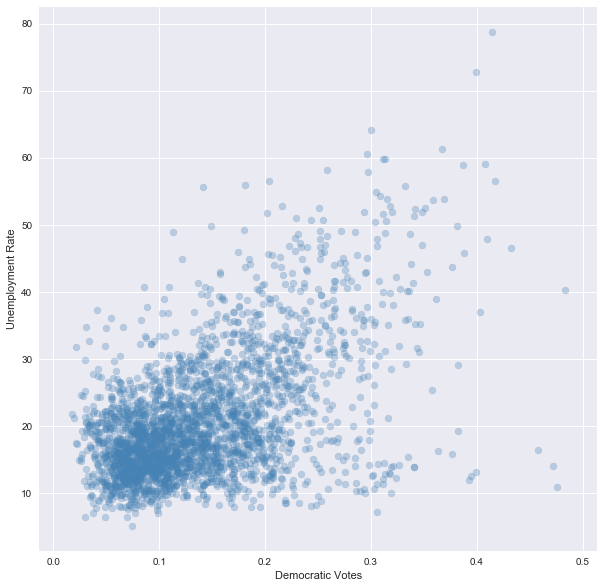

In [58]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'per_bachelors_or_higher_2011', data=df_2016_normalized, alpha=.3, color='steelblue');

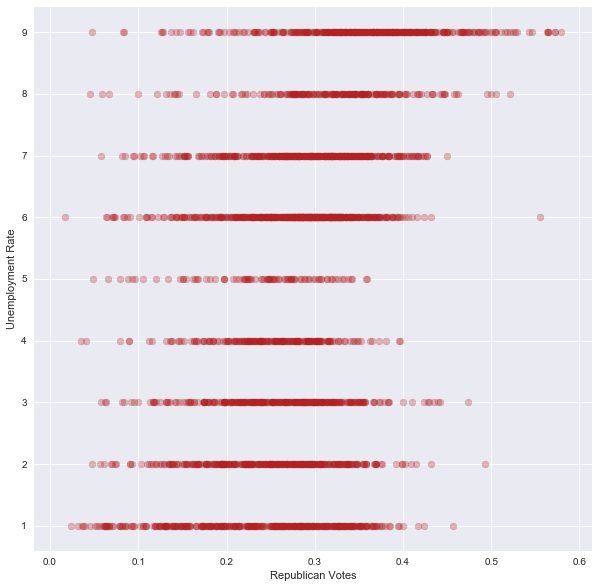

In [59]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'continuum_2013', data=df_2016_normalized, alpha=.3, color='firebrick');

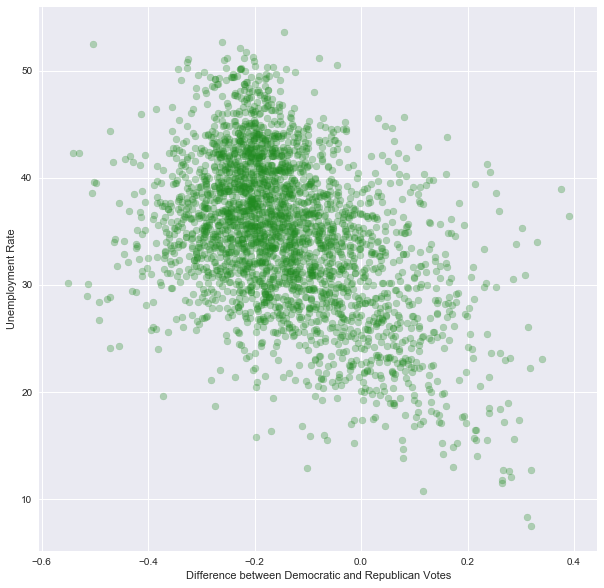

In [60]:
plt.figure(figsize = [10, 10])
plt.xlabel('Difference between Democratic and Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('vote_diff', 'per_high_diploma_2011', data=df_2016_normalized, alpha=.3, color='forestgreen');

In [61]:
df_2004_normalized.to_csv('./csv_files/df_2004', index=False)
df_2008_normalized.to_csv('./csv_files/df_2008', index=False)
df_2012_normalized.to_csv('./csv_files/df_2012', index=False)
df_2016_normalized.to_csv('./csv_files/df_2016', index=False)

### Next Notebook [Linear Modeling](Strike_a_Line_Pose.ipynb)